# DS CA2
written by:
- Babak Hosseini Mohtasham 810101408
- Mahdi Naieni 810101536
- ...

## Libraries:

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1:
The provided dataset(task1.csv) contains information about the passengers of the sunken
ship ‘RMS Lusitania’. In this task, we will become familiar with working with numpy, pandas,
and matplotlib.

### Questions:
1. First, read the file using the pandas library and save it in a pandas dataframe. Then, using the methods 'info', 'head', 'tail', 'describe' from the pandas library, examine the general structure of the data, and explain what information each of the outputs shows. 
    - **.info()**: This method provides concise information about the DataFrame, including data types of each column and the number of non-null values.
    - .**head(n)**: This method displays the first 'n' rows of the DataFrame (default n=5).
    - **.tail(n)**: Similar to .head(), this method displays the last 'n' rows of the DataFrame.
    - **.describe()**: This method provides summary statistics for numerical columns in the DataFrame, including mean, standard deviation, quartiles, etc.

In [213]:
data = pd.read_csv("task1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [214]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [215]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [12]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Show the type of each data column. Some columns are of type categorical and some are of type numerical from the pandas library info. To process the non-numerical columns, one of the possible methods is labeling; in such a way that each of the categories is replaced by a number. For example, in this dataset, there is a categorical column named sex, which includes values Male and Female. Modify the values of this column, so that each of these models is mapped to one of the numbers in the range [0,1].


In [216]:
df = pd.DataFrame(data)
print("before labeling:")
print(df.dtypes)

before labeling:
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [217]:
df = pd.DataFrame(data)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['alive'] = df['alive'].map({'yes': 1, 'no': 0})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})
print("after labeling:")
print(df.dtypes)

after labeling:
survived         int64
pclass           int64
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class            int64
who             object
adult_male        bool
deck            object
embark_town     object
alive            int64
alone             bool
dtype: object


3. Generate a heatmap of the correlation matrix for numerical features in the dataset.

- Correlation Matrix:
    - It's a table that shows the correlation between pairs of variables in your data.
    - Correlation measures how much two variables change together.
    - A value of 1 indicates a perfect positive correlation (as one goes up, the other goes up proportionally).
    - A value of -1 indicates a perfect negative correlation (as one goes up, the other goes down proportionally).
    - A value of 0 indicates no correlation.

- Heatmap Visualization:
    - A heatmap uses colors to represent the correlation values in the matrix.
    - Typically, red represents positive correlations (stronger as the color gets darker red).
    - Blue represents negative correlations (stronger as the color gets darker blue).
    - White or yellow often represent values close to 0 (weak or no correlation).

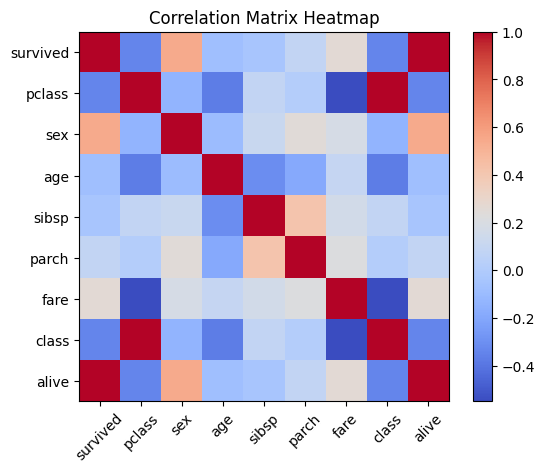

In [218]:
numerical_cols = df.select_dtypes(include=[np.number])
correlation = numerical_cols.corr()

plt.imshow(correlation, cmap='coolwarm')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation= 45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.show()

4. Columns that are not on the main diagonal and have a correlation of 1 mean that one column is extra and can be removed. Therefore, based on this, delete the extra columns that meet these conditions.

Before dropping the extra columns


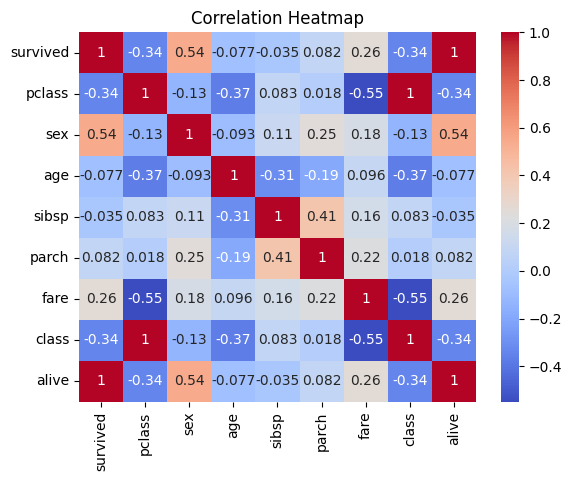

In [219]:
print("Before dropping the extra columns")
numerical_cols = df.select_dtypes(include=[np.number])
correlation = numerical_cols.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [220]:
# Identify columns with correlation of 1
highly_correlated_cols = set()
cols_to_remove = set()
correlated_cols = set()
for col in correlation.columns:
    for other_col in correlation.columns:
        if col != other_col and correlation.loc[col, other_col] == 1:
            if not(col in highly_correlated_cols):
                cols_to_remove.add(col)
                correlated_cols.add((col, other_col))
            highly_correlated_cols.add(col)
            highly_correlated_cols.add(other_col)

# Drop the extra columns
for col in cols_to_remove:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

if correlated_cols:
    print("correlated columns:")
    for correlated in correlated_cols:
        print(correlated[0], "and", correlated[1])

if cols_to_remove:
    print("---------------------")
    print(f"Dropped columns: {', '.join(cols_to_remove)}")

correlated columns:
pclass and class
survived and alive
---------------------
Dropped columns: pclass, survived


After dropping the extra columns


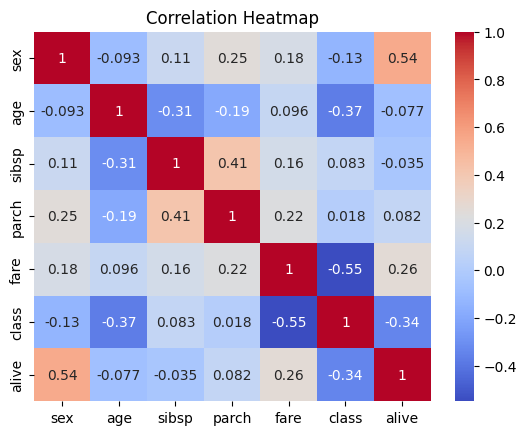

In [221]:
print("After dropping the extra columns")
numerical_cols = df.select_dtypes(include=[np.number])
correlation = numerical_cols.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

5. How many passengers survived (survived == 1) the disaster?

In [222]:
df = pd.DataFrame(data)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
survived_passengers = df[df['survived'] == 1]
number_of_survived = survived_passengers.shape[0]
print(f"Number of survived: {number_of_survived}")

Number of survived: 342


6. Find all female passengers aged more than 30 years. How many are there?

In [223]:
females_over_30 = df[(df['sex'] == 1) & (df['age'] > 30)]
number_of_females_over_30 = females_over_30.shape[0]
print(f"Number of females over 30: {number_of_females_over_30}")

Number of females over 30: 103


7. Identify passengers who embarked from Cherbourg ('C') and paid a fare greater than $100.

In [224]:
filtered_df = df[(df['embarked'] == 'C') & (df['fare'] > 100)]
print(f"Number of them: {filtered_df.shape[0]}")
filtered_df

Number of them: 29


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,1,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
118,0,1,0,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
195,1,1,1,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
215,1,1,1,31.0,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
258,1,1,1,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
299,1,1,1,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
306,1,1,1,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True
307,1,1,1,17.0,1,0,108.9000,C,First,woman,False,C,Cherbourg,yes,False
311,1,1,1,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
319,1,1,1,40.0,1,1,134.5000,C,First,woman,False,E,Cherbourg,yes,False


8. Identify columns with missing values. Propose and apply a strategy for handling these missing values.

In [225]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Handling Missing Values:
1. Dropping rows/columns: This is the simplest approach. We can drop rows with any missing values (df.dropna()) or drop entire columns with a high percentage of missing values. However, this can lead to data loss.
2. Imputation: This involves filling in missing values with estimated values. Common techniques include:
    - Mean/Median/Mode: Replace missing values with the mean, median, or most frequent value for the column (suitable for numerical data).
    - Forward fill/Backward fill: Copy the value from the previous/next non-missing row for that column (works for ordered data).
    - Categorical Data: For categorical data, you might fill missing values with the most frequent category or a new category indicating missingness.
3. Feature Engineering: Create new features based on existing ones to handle missing values. For example, group age categories instead of using specific ages if there are many missing values in the age column.

In [226]:
# Fill missing values in 'age' column for female passengers with the female median age
median_age = df[(df['sex'] == 1)]['age'].median()
df.loc[df['sex'] == 1, 'age'] = df.loc[df['sex'] == 1, 'age'].fillna(median_age)

# Fill missing values in 'age' column for male passengers with the male median age
median_age = df[(df['sex'] == 0)]['age'].median()
df.loc[df['sex'] == 0, 'age'] = df.loc[df['sex'] == 0, 'age'].fillna(median_age)

# Fill missing values in 'deck' column with the most frequent deck
most_frequent_deck = df['deck'].mode()[0]
df['deck'].fillna(most_frequent_deck, inplace=True)

# Fill missing values in 'embarked' column with the most frequent embarked
most_frequent_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(most_frequent_embarked, inplace=True)

# Fill missing values in 'embark_town' column with the most frequent embark_town
most_frequent_embark_town = df['embark_town'].mode()[0]
df['embark_town'].fillna(most_frequent_embark_town, inplace=True)

missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


9. What is the average age of passengers on the ship? How does it differ between males and females?

In [227]:
average_age = df['age'].mean()
average_age_by_sex = df.groupby('sex')['age'].mean()

print(f"The average age of all passengers is {average_age:.2f} years old.")
print(f"The average age of males is {average_age_by_sex[0]:.2f} years old.")
print(f"The average age of females is {average_age_by_sex[1]:.2f} years old.")

print("-----------------------------------------------------")
if average_age_by_sex[1] > average_age_by_sex[0]:
    print("Females tend to be older than males")
else:
    print("Males tend to be older than females!")

The average age of all passengers is 29.44 years old.
The average age of males is 30.36 years old.
The average age of females is 27.76 years old.
-----------------------------------------------------
Males tend to be older than females!


10. Is there a correlation between fare paid and survival rate? Provide a statistical summary.

Yes, there is a positive correlation between fare paid and survival rate. This means that passengers who paid higher fares were more likely to survive.

In [228]:
correlation = df['fare'].corr(df['survived'])
print(f"Correlation between fare and survival: {correlation:.2f}")

# Descriptive statistics of fare for survived and not survived passengers
fare_survived_stats = df.groupby('survived')['fare'].describe()
print("-----------------------------------------------------")
print(f"Descriptive statistics of fare (grouped by survival):")
print(fare_survived_stats)

Correlation between fare and survival: 0.26
-----------------------------------------------------
Descriptive statistics of fare (grouped by survival):
          count       mean        std  min      25%   50%   75%       max
survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


11. Use Matplotlib to plot the proportion of passengers that survived by class.

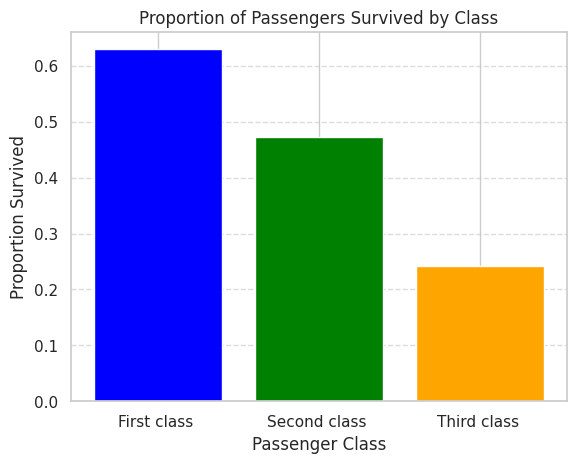

In [257]:
sns.set_theme(style="whitegrid")
class_survival_rates = {}
for pclass, survived in zip(data["class"], data["survived"]):
    if pclass not in class_survival_rates:
        class_survival_rates[pclass] = [0, 0]
    class_survival_rates[pclass][0] += survived
    class_survival_rates[pclass][1] += 1

class_survival_rates = dict(sorted(class_survival_rates.items()))
pclass_labels = [f"{pclass} class " for pclass in class_survival_rates.keys()]
survival_rates = [rate[0] / rate[1] for rate in class_survival_rates.values()]

plt.bar(pclass_labels, survival_rates, color=['blue', 'green', 'orange'])
plt.xlabel("Passenger Class")
plt.ylabel("Proportion Survived")
plt.title("Proportion of Passengers Survived by Class")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

12. Plot the age distribution of passengers, distinguishing between those who survived and those who didn't.

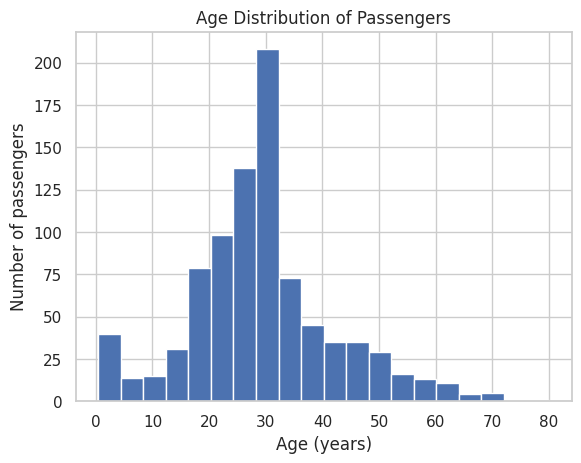

In [252]:
sns.set_theme(style="whitegrid")
plt.hist(df['age'], bins=20, alpha=1)
plt.xlabel('Age (years)')
plt.ylabel('Number of passengers')
plt.title('Age Distribution of Passengers')
plt.grid(True)
plt.show()

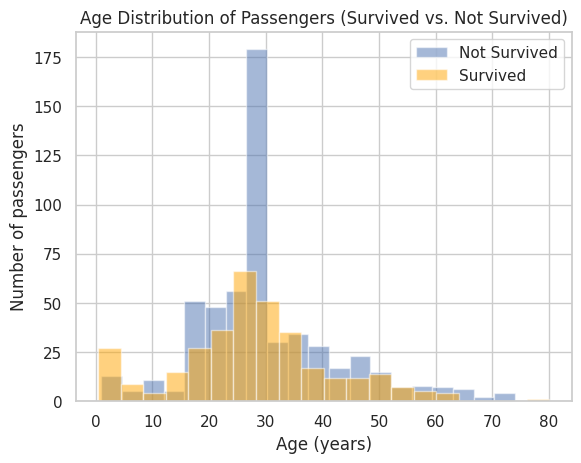

In [288]:
sns.set_theme(style="whitegrid")
survived_passengers = df[df['survived'] == 1]
not_survived_passengers = df[df['survived'] == 0]

# Histogram for not survived passengers
plt.hist(not_survived_passengers['age'], bins=20, alpha=0.5, label='Not Survived')

# Histogram for survived passengers
plt.hist(survived_passengers['age'], bins=20, alpha=0.5, label='Survived', color="orange")

plt.xlabel('Age (years)')
plt.ylabel('Number of passengers')
plt.title('Age Distribution of Passengers (Survived vs. Not Survived)')
plt.legend()
plt.grid(True)
plt.show()

13. Create a scatter plot showing the relationship between age and fare paid, color-coded by survival.

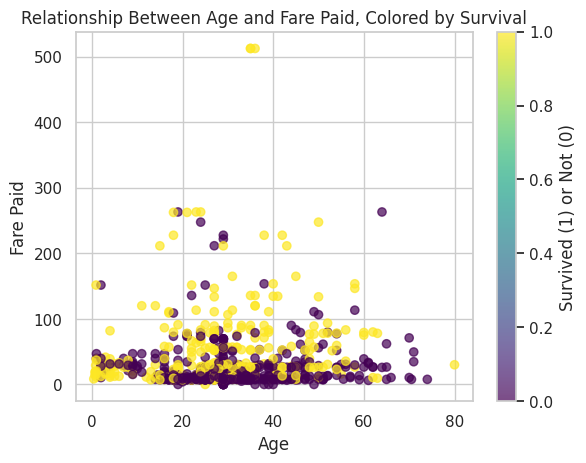

In [259]:
sns.set_theme(style="whitegrid")
plt.scatter(df['age'], df['fare'], c=df['survived'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.title('Relationship Between Age and Fare Paid, Colored by Survival')
plt.colorbar(label='Survived (1) or Not (0)')
plt.grid(True)
plt.show()

14. Create a pivot table to show the average fare and survival rate for each class and sex combination.

In [270]:
df = pd.DataFrame(data)
pivot_table = df.pivot_table(index=['sex', 'class'], values=['fare', 'survived'], aggfunc={'fare': 'mean', 'survived': 'mean'})
pivot_table.reset_index(inplace=True)
pivot_table


,sex,class,fare,survived
0,female,First,106.125798,0.968085
1,female,Second,21.970121,0.921053
2,female,Third,16.118810,0.500000
3,male,First,67.226127,0.368852
4,male,Second,19.741782,0.157407
5,male,Third,12.661633,0.135447


15. Plot a grouped bar chart using Matplotlib to show the average fare paid by passengers, grouped by their class and survival status.

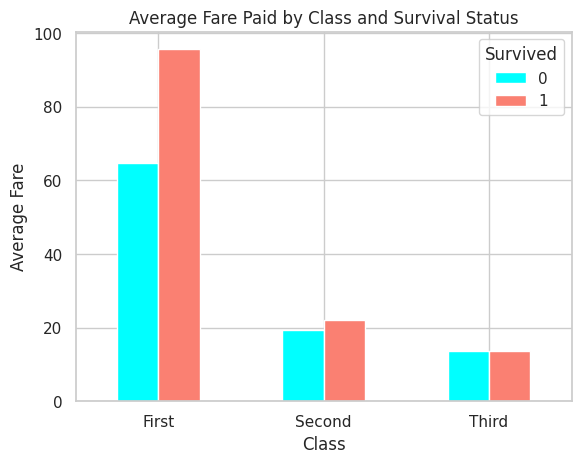

In [281]:
grouped_data = df.groupby(['class', 'survived'])['fare'].mean().unstack()
grouped_data.plot(kind='bar', color=['cyan', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.title('Average Fare Paid by Class and Survival Status')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()